# Maximum Likelihood Estimation

Logistic Regression에서 weights값들을 학습시키는 방법을 기술합니다. 

### Likelihood

Sum-squred error 에서 cost값을 낮추려고 하였습니다. <br>
Logistic Regression에서 사용되는 cost function을 알기 위해서는 Likelihood를 먼저 알아야 하고, <br>
Likelihood는 sum-squred error와는 다르게 maximize해야 합니다. 

<i class="fa fa-exclamation-circle" aria-hidden="true" style="color:#777;"> 여기서 bold체는 series (list)입니다.</i>

### $$ L(\mathbf{w}) = P(\mathbf{y}\ |\ \mathbf{x};\mathbf{w}) = \prod^n_{i=1} P(y^{(i)}\ |\ x^{(i)}; \mathbf{w}) = \prod^n_{i=1} \left( \phi(z^{(i)} \right)^{y^{(i)}} \left(1 - \phi(z^{(i)}) \right)^{1-y^{(i)}} $$

In [23]:
%pylab inline
from sympy import *
import numpy as np
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


### Data Preparation

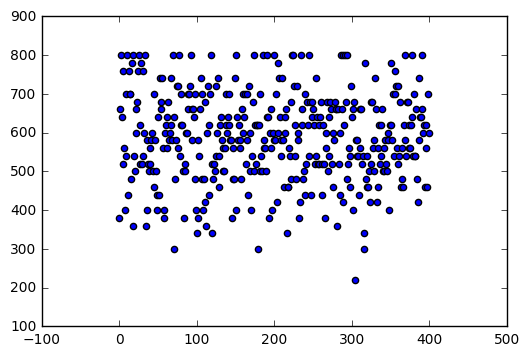

In [30]:
data = np.loadtxt('../../data/basic_csv_data/binary.csv', delimiter=',', skiprows=1)

Y = data[:, 0] # 0:불합격, 1:합격 
X = data[:, 1:] # GRE, GPA, Rank


scatter(np.arange(len(X)), X[:,0])